# Measurements & Plots for the article

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json

In [8]:
def mpi_plot(mpi_1_blade, mpi_2_blades, mpi_4_blades, test):
    cores = [1, 2, 4, 8, 16, 32, 64]
    ticks = [i for i in range(len(cores))]
    ticks_mpi_2 = [i for i in range(1, len(cores))]
    ticks_mpi_4 = [i for i in range(2, len(cores))]

    plt.figure(figsize=(12, 4), layout='constrained')
    plt.xticks(ticks, cores)

    for i in ticks:
        leg1, leg2, leg3 = f"{mpi_1_blade[i]}s", f"{mpi_2_blades[i-1]}s" if i-1 >= 0 else "N/A", f"{mpi_4_blades[i-2]}s" if i-2 >= 0 else "N/A"
        print(i, leg1, leg2, leg3)

        custom_y = [35, 25, 15]
        if i == 0:
            custom_y = [-45, -55, -65]

        plt.annotate(f'{leg1}', (i, mpi_1_blade[i]), textcoords="offset points", xytext=(5, custom_y[0]), ha='center', color="#FFAD33")
        plt.annotate(f'{leg2}', (i, mpi_1_blade[i]), textcoords="offset points", xytext=(5, custom_y[1]), ha='center', color="#13B151")
        plt.annotate(f'{leg3}', (i, mpi_1_blade[i]), textcoords="offset points", xytext=(5, custom_y[2]), ha='center', color="#8313B1")

    # plt.plot(ticks, seq, label="Sequential")
    plt.plot(ticks, mpi_1_blade, label="MPI with 1 node", color="#FFAD33")
    plt.plot(ticks_mpi_2, mpi_2_blades, label="MPI with 2 nodes", color="#13B151")
    plt.plot(ticks_mpi_4, mpi_4_blades, label="MPI with 4 nodes", color="#8313B1")
    plt.xlabel("Total number of cores $n$")
    plt.ylabel("Total runtime $t$ (in $s$)")
    plt.legend()
    plt.title(f"MPI timings on different number of cores, with the {test} test")
    plt.grid(ls="--", c="#E8E8E8")
    plt.show()
    return None

0 186.330804s N/A N/A
1 93.181741s 93.209309s N/A
2 46.803297s 46.745442s 48.039279s
3 23.506253s 23.95842s 25.621132s
4 12.222562s 12.602155s 13.222755s
5 6.719691s 7.7495095s 8.200223s
6 4.124891s 8.431912s 7.0875s


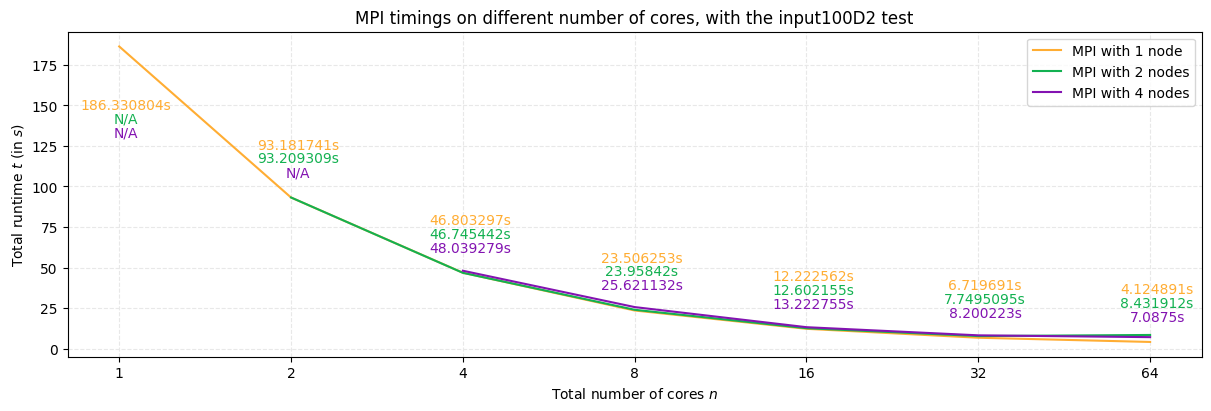

In [ ]:
cores = [1, 2, 4, 8, 16, 32, 64]
seq = [390.007038 for _ in range(len(cores))]

mpi_1_blade = [186.330804,
       93.181741,
       46.803297,
       23.506253,
       12.222562,
       6.719691,
       4.124891]
mpi_2_machines = [#0,
                  93.209309,
                  46.745442,
                  23.958420,
                  12.602155,
                  (7.543724 + 7.955295)/2,
                  round((7.536544 + 8.529703 + 9.229490)/3, 6)]
mpi_4_machines = [#0,
                  48.039279,
                  25.621132,
                  13.222755,
                  8.200223,
                  7.087500]




mpi_plot(mpi_1_blade, mpi_2_machines, mpi_4_machines, "input100D2")

# 8.480812 con 4 * 32 cores